<a href="https://colab.research.google.com/github/KleberMoreira3010/Analise-de-Dados---Python-e-R/blob/master/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
train = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
#Função agregação, pode ser usado describe ou função individuais (mean, max, min)
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [ ]:
#Utilizando o método unstack 

drinks.groupby('continent').beer_servings.describe().unstack()

       continent    
count  Africa            53.000000
       Asia              44.000000
       Europe            45.000000
       North America     23.000000
       Oceania           16.000000
       South America     12.000000
mean   Africa            61.471698
       Asia              37.045455
       Europe           193.777778
       North America    145.434783
       Oceania           89.687500
       South America    175.083333
std    Africa            80.557816
       Asia              49.469725
       Europe            99.631569
       North America     79.621163
       Oceania           96.641412
       South America     65.242845
min    Africa             0.000000
       Asia               0.000000
       Europe             0.000000
       North America      1.000000
       Oceania            0.000000
       South America     93.000000
25%    Africa            15.000000
       Asia               4.250000
       Europe           127.000000
       North America     80.000000

In [ ]:
#Criando um DataFrame
df=pd.DataFrame({'name':['A', 'A','B', 'B' ], 'day':[1,2,1,1], 'height':[67,67, 72,72], 'weight':[100,103,130,129]})

In [ ]:
df

,name,day,height,weight
0,A,1,67,100
1,A,2,67,103
2,B,1,72,130
3,B,1,72,129


In [ ]:
#Criando Multi-indice

df.set_index(['name', 'day'])

height  weight
name day                
A    1        67     100
     2        67     103
B    1        72     130
     1        72     129

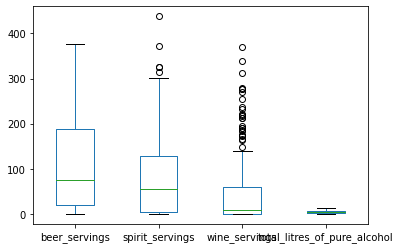

In [ ]:
drinks.plot(kind='box')

In [ ]:
movies.loc[movies.duration >=200, :]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [ ]:
#Filtrando e contando por gênero
movies[movies.duration>=200].genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

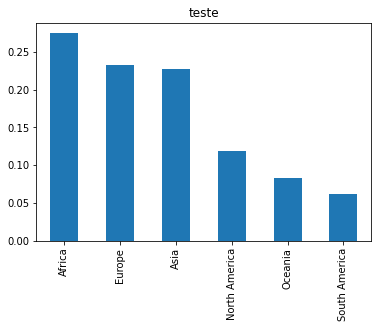

In [ ]:
drinks.continent.value_counts(normalize=True).plot(kind='bar', title='teste')

In [ ]:
#Criando duas visões e concatenando

a=drinks.continent.value_counts()

In [ ]:
b=drinks.continent.value_counts(normalize=True)


In [ ]:
a

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [ ]:
b

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

In [ ]:
pd.concat([a,b], axis=1)

,continent,continent
Africa,53,0.274611
Europe,45,0.233161
Asia,44,0.227979
North America,23,0.119171
Oceania,16,0.082902
South America,12,0.062176


In [ ]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
drinks['beer']=drinks.beer_servings.astype(str)

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,89
2,Algeria,25,0,14,0.7,Africa,25
3,Andorra,245,138,312,12.4,Europe,245
4,Angola,217,57,45,5.9,Africa,217


In [ ]:
mapping = {'R':'no', 'PG-13': 'yes', 'PG': 'maybe', 'G':'esquece'}

In [ ]:
movies.content_rating.map(mapping)

0         no
1         no
2         no
3        yes
4         no
       ...  
974    maybe
975    maybe
976      yes
977    maybe
978       no
Name: content_rating, Length: 979, dtype: object

In [ ]:
mapping2 = pd.DataFrame({'ratings':['R', 'PG-13'], 'kids':['no','yes']})
mapping2

,ratings,kids
0,R,no
1,PG-13,yes


In [ ]:
#Juntando dois DataFrames e usando Condicional ao mesmo tempo

pd.merge(movies, mapping2, left_on='content_rating', right_on='ratings')

,star_rating,title,content_rating,genre,duration,actors_list,ratings,kids
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,no
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,no
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",R,no
3,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",R,no
4,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",R,no
...,...,...,...,...,...,...,...,...
644,7.4,Lincoln,PG-13,Biography,150,"[u'Daniel Day-Lewis', u'Sally Field', u'David ...",PG-13,yes
645,7.4,Limitless,PG-13,Mystery,105,"[u'Bradley Cooper', u'Anna Friel', u'Abbie Cor...",PG-13,yes
646,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy...",PG-13,yes
647,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha...",PG-13,yes


In [ ]:
ufo.shape

(18241, 5)

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [ ]:
#Criando um coluna com Ano
ufo['Year']=ufo.Time.dt.year.astype(str)

In [ ]:
#Criando coluna mês
ufo['month']=ufo.Time.dt.month.astype(str).str.pad(width=2, fillchar='0')

In [ ]:
#Concatenando duas colunas
ufo['new']=ufo.Year.str.cat(ufo.month, sep='-')

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,month,Year,new
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,06,1930,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,06,1930,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,02,1931,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,06,1931,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,04,1933,1933-04


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,young_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [ ]:
#Outra forma de filtrar e aplicar uma coluna condicional

train['young_male'] = ((train.Sex =='male') & (train.Age <30)).map({True:'yes', False:'no'})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,young_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,month,Year,new
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,06,1930,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,06,1930,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,02,1931,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,06,1931,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,04,1933,1933-04


In [ ]:
ufo.City.isnull().sum()

25

In [ ]:
ufo.loc[ufo.City.isnull() & (ufo['Colors Reported']=='RED'), :]

,City,Colors Reported,Shape Reported,State,Time,month,Year,new
3123,NaN,RED,TRIANGLE,WV,1975-11-25 23:00:00,11,1975,1975-11
12441,NaN,RED,FIREBALL,WA,1998-10-26 17:58:00,10,1998,1998-10


In [ ]:
#Filtrando com parâmetro de exclusão

drinks[~drinks.continent.isin(['Asia', 'Africa'])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
1,Albania,89,132,54,4.9,Europe,89
3,Andorra,245,138,312,12.4,Europe,245
5,Antigua & Barbuda,102,128,45,4.9,North America,102
6,Argentina,193,25,221,8.3,South America,193
7,Armenia,21,179,11,3.8,Europe,21
...,...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,Europe,219
184,USA,249,158,84,8.7,North America,249
185,Uruguay,115,35,220,6.6,South America,115
187,Vanuatu,21,18,11,0.9,Oceania,21


In [ ]:
drinks[(drinks.continent == 'Africa') | (drinks.continent=='Asia') ]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
0,Afghanistan,0,0,0,0.0,Asia,0
2,Algeria,25,0,14,0.7,Africa,25
4,Angola,217,57,45,5.9,Africa,217
12,Bahrain,42,63,7,2.0,Asia,42
13,Bangladesh,0,0,0,0.0,Asia,0
...,...,...,...,...,...,...,...
186,Uzbekistan,25,101,8,2.4,Asia,25
189,Vietnam,111,2,1,2.0,Asia,111
190,Yemen,6,0,0,0.1,Asia,6
191,Zambia,32,19,4,2.5,Africa,32
